In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

C:\Users\Bjorn\anaconda3\envs\new_tf\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Bjorn\anaconda3\envs\new_tf\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Summary statistics of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

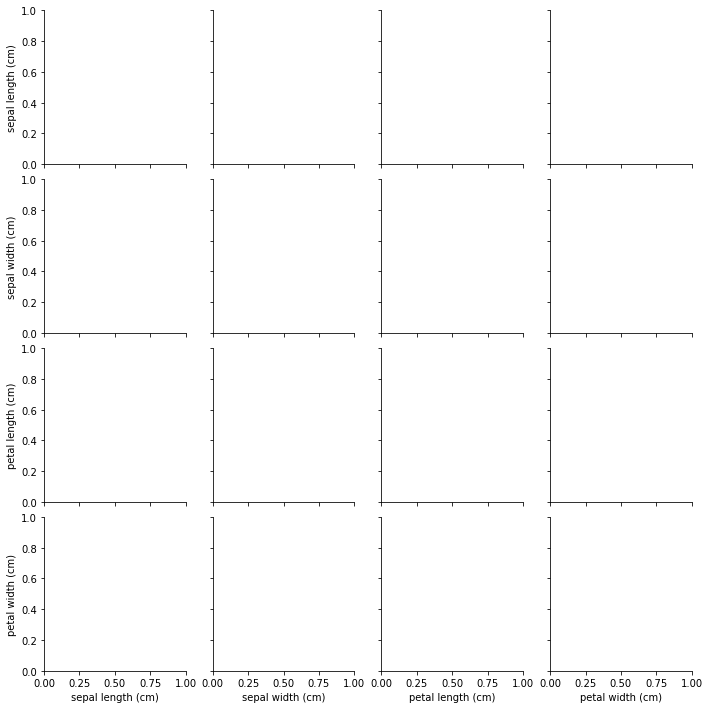

In [2]:

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature data
y = iris.target  # True labels (for evaluation purposes only, will not be used in clustering)

# Convert to DataFrame for easier visualization and manipulation
df = pd.DataFrame(X, columns=iris.feature_names)

# Quick exploratory data analysis (EDA)
print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary statistics of the dataset:")
print(df.describe())

# Visualize pairwise relationships between features
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise feature distribution", y=1.02)
plt.show()


In [ ]:

# Step 1: Preprocessing - Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Step 2: Apply K-means clustering
# Set the number of clusters to 3, as we expect 3 clusters (one for each iris species)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 3: Visualize the clustering using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering on Iris Dataset (PCA-reduced data)")
plt.legend()
plt.show()

# Step 4: Evaluation (Optional, for lecture purposes)
# Compute silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Compare with true labels using Adjusted Rand Index
ari_score = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index (for reference): {ari_score:.2f}")
